# 군집화

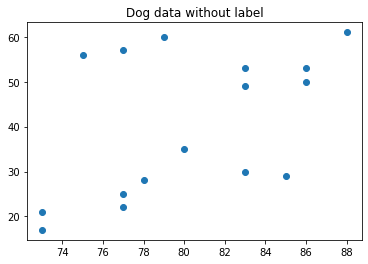

In [1]:
import numpy as np
import matplotlib.pyplot as plt

dach_length = [77,78,85,83,73,77,73,80]
dach_height = [25,28,29,30,21,22,17,35]

samo_length = [75,77,86,86,79,83,83,88]
samo_height = [56,57,50,53,60,53,49,61]

dog_length = np.array(dach_length + samo_length)
dog_height = np.array(dach_height + samo_height)

dog_data = np.column_stack((dog_length, dog_height))

plt.title("Dog data without label")
plt.scatter(dog_length, dog_height)

데이터를 두 개의 그룹으로 나누는 k-means 알고리즘을 적용
- k-means 알고리즘은 sklearn에서 제공하는 cluster 모듈에 존재
    - k-nn은 분류기법(k=이웃의 수), k-means는 군집화 기법(k = 군집화 개수)

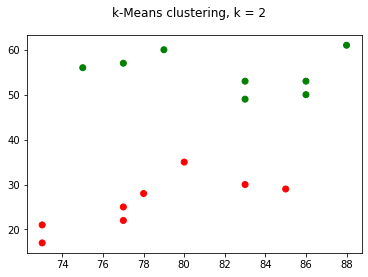

In [2]:
from sklearn import cluster

def kmeans_predict_plot(X,k):
    model = cluster.KMeans(n_clusters=k)
    model.fit(X)
    labels = model.predict(X)
    colors = np.array(['red','green','blue','magenta'])
    plt.suptitle('k-Means clustering, k = {}'.format(k))
    plt.scatter(X[:, 0], X[:, 1], color = colors[labels])

kmeans_predict_plot(dog_data, k = 2)

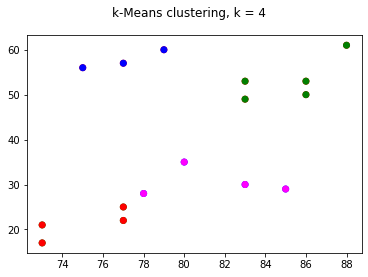

In [3]:
kmeans_predict_plot(dog_data, k= 3) #3개의 군집생성
kmeans_predict_plot(dog_data, k= 4) #4개의 군집생성

# iris 붓꽃 데이터를 군집화

In [4]:
from sklearn import cluster
from sklearn.datasets import load_iris
import numpy as np

iris = load_iris()
k = len(iris.target_names) #몇 개의 군집으로 나눌지를 결정한다

In [5]:
print('KMeans() 군집화 적용...')
model = cluster.KMeans(n_clusters = k)
model.fit(iris.data)
labels = model.predict(iris.data)
print('군집화 결과 labels :', labels)
a_counts = np.bincount(labels[:50])
b_counts = np.bincount(labels[50:100])
c_counts = np.bincount(labels[100:])

KMeans() 군집화 적용...
군집화 결과 labels : [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [6]:
d = { 0: np.argmax(a_counts), 1 : np.argmax(b_counts), 2 : np.argmax(c_counts)}
new_labels = np.copy(labels)
for old, new in d.items():
    new_labels[labels == old] = new
print('다시 레이블링을 한 후의 new_labels =', new_labels)


다시 레이블링을 한 후의 new_labels = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [7]:
from sklearn.metrics import accuracy_score
print('iris 데이터의 군집화 정확도:', accuracy_score(iris.target, new_labels))

iris 데이터의 군집화 정확도: 0.8933333333333333


## 5장 미니 프로젝트 잡음제거 : k-NN의 활용

In [8]:
import matplotlib.pyplot as plt
import numpy as np

from skimage.io import imread # 이미지를 읽어들인다.
from skimage.transform import resize # 이미지의 크기를 변경할 수 있다.

In [9]:
url = 'https://github.com/dknife/ML/raw/main/data/Proj1/40/'

imgR, imgC, channel = 24, 24, 3
images = []

for i in range(40):
    file = url + 'img{0:02d}.jpg'.format(i+1) #이미지 파일 이름을 만든다.
    img = imread(file) #이미지를 읽는다
    img = resize(img, (imgR, imgC, channel)) #이미지의 크기를 변경한다.
    images.append(img) # image 리스트에 담는다.

In [10]:
def plot_images(nRow, nCol, img):
    fig = plt.figure()
    fig, ax = plt.subplots(nRow, nCol, figsize = (nCol,nRow))
    for i in range(nRow):
        for j in range(nCol):
            if nRow <= 1: 
                axis = ax[j]
            else:
                axis = ax[i,j]
            axis.get_xaxis().set_visible(False)
            axis.get_yaxis().set_visible(False)
            axis.imshow(img[i*nCol+j])

<Figure size 432x288 with 0 Axes>

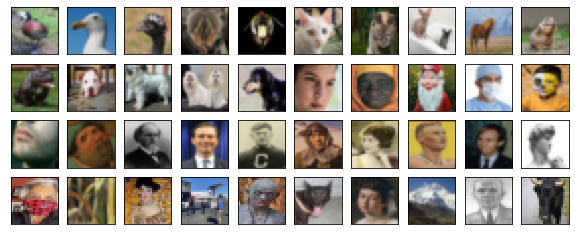

In [16]:
plot_images(4,10,images)

<Figure size 432x288 with 0 Axes>

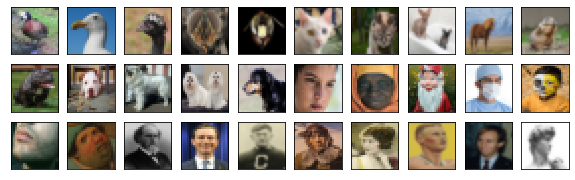

<Figure size 432x288 with 0 Axes>

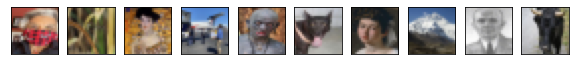

In [11]:
### 훈련용 데이터와 검증용 데이터 분리
X = np.array(images[:30])
X_test = np.array(images[30:])
plot_images(3,10,X)
plot_images(1,10,X_test)

In [12]:
### 입력 데이터 준비
X_noisy = X + np.random.randn(len(X), imgR, imgC, channel)*0.1
X_noisy = np.clip(X_noisy, 0, 1)
X_test_noisy = X_test + np.random.randn(len(X_test),imgR, imgC, channel)*0.1
X_test_noisy = np.clip(X_test_noisy,0,1)

<Figure size 432x288 with 0 Axes>

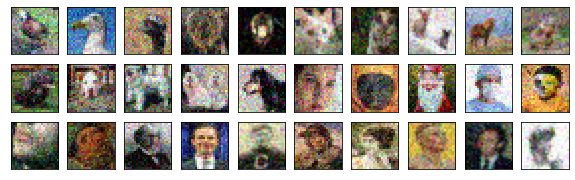

<Figure size 432x288 with 0 Axes>

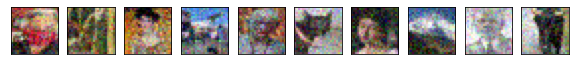

In [13]:
# 잡음이 추가된 이미지 확인
plot_images(3,10,X_noisy)
plot_images(1,10,X_test_noisy)

In [14]:
### 분류기 입출력 데이터 형식에 맞추어 훈련하기
X_noisy_flat = X_noisy.reshape(-1, imgR*imgC*channel)
X_flat = np.array(X.reshape(-1, imgR*imgC*channel) * 255, dtype = np.uint)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_noisy_flat, X_flat)

KNeighborsClassifier()

<Figure size 432x288 with 0 Axes>

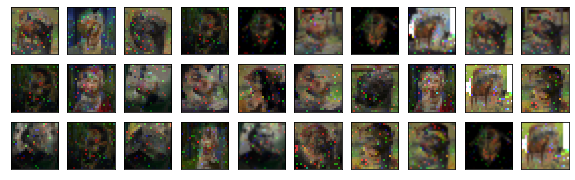

In [16]:
denoised_result = knn.predict(X_noisy_flat)
denoised_result = denoised_result.reshape(-1, imgR, imgC, channel)
plot_images(3,10, denoised_result)

In [17]:
### 데이터를 증강하여 훈련효과 높이기
n_augmentation = 100
X_noisy_aug = X + np.random.rand(len(X), imgR, imgC, channel)*0.2
y_label = np.array(X*255, dtype = np.uint)
y = y_label

print(X_noisy.shape)
for i in range(n_augmentation):
    noisy_data = X + np.random.randn(len(X), imgR, imgC, channel)*0.2
    X_noisy_aug = np.append(X_noisy_aug, noisy_data, axis = 0)
    y = np.append(y, y_label, axis = 0)

X_noisy_aug = np.clip(X_noisy_aug, 0, 1)
X_noisy_aug.shape, y.shape

(30, 24, 24, 3)


((3030, 24, 24, 3), (3030, 24, 24, 3))

<Figure size 432x288 with 0 Axes>

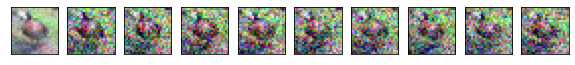

In [18]:
plot_images(1,10,X_noisy_aug[0:300:30])

In [19]:
# 차원을 1차원 벡터의 배열로 변환한다.
X_noisy_aug_flat = X_noisy_aug.reshape(-1,imgR*imgC*channel)
y_flat = y.reshape(-1, imgR*imgC*channel)

knn.fit(X_noisy_aug_flat, y_flat)

KNeighborsClassifier()

<Figure size 432x288 with 0 Axes>

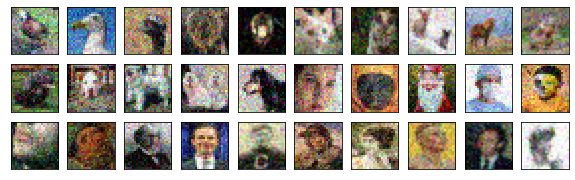

<Figure size 432x288 with 0 Axes>

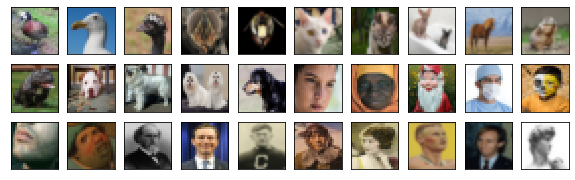

In [20]:
### 잡음이 없도록
denoised_result = knn.predict(X_noisy_flat)
denoised_result = denoised_result.reshape(-1,imgR,imgC,channel)

plot_images(3,10,X_noisy)
plot_images(3,10,denoised_result)


<Figure size 432x288 with 0 Axes>

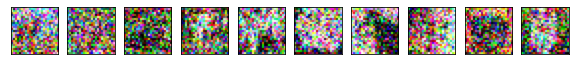

<Figure size 432x288 with 0 Axes>

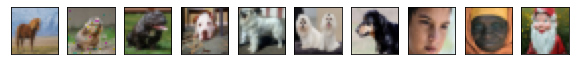

In [21]:
### 검증 데이터로 일반화 능력을 살펴보자
rndidx = np.random.randint(0,20)
data = X[rndidx:rndidx+10] + np.random.randn(10, imgR, imgC, channel)*0.4
data = np.clip(data, 0, 1)
data_flat = data.reshape(-1, imgR*imgC*channel)

denoised = knn.predict(data_flat)
denoised = denoised.reshape(-1, imgR, imgC, channel)
denoised = np.clip(denoised, 0, 255)

plot_images(1,10,data)
plot_images(1,10,denoised)

<Figure size 432x288 with 0 Axes>

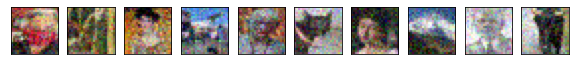

<Figure size 432x288 with 0 Axes>

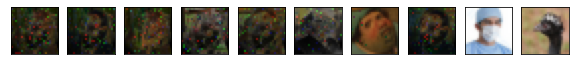

In [22]:
denoised = knn.predict(X_test_noisy.reshape(-1,imgR*imgC*channel))
denoised = denoised.reshape(-1,imgR,imgC, channel)

plot_images(1,10,X_test_noisy)
plot_images(1,10,denoised)

In [23]:
### 데이터 증강으로 일반화 능력 높이기
# 이미지 데이터를 증강시키기
from keras.preprocessing.image import ImageDataGenerator
image_generator = ImageDataGenerator(
    rotation_range = 360,
    zoom_range = 0.1,
    shear_range = 0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
    vertical_flip = True
)

In [24]:
y_aug = X.reshape(-1, imgR, imgC, channel)
it = image_generator.flow(y_aug)
nData = y_aug.shape[0]

In [25]:
X_aug = y_aug + np.random.randn(nData, imgR, imgC, channel)*0.1

In [26]:
n_augmentation = 500
for _ in range(n_augmentation):
    new_y = it.next()
    new_X = new_y + np.random.randn(nData, imgR, imgC, channel)*0.1
    y_aug = np.append(y_aug, new_y)
    X_aug = np.append(X_aug, new_X)

y_aug = np.array(y_aug * 255, dtype = np.uint)
y_aug = y_aug.reshape(-1,imgR, imgC, channel)
X_aug = X_aug.reshape(-1,imgR,imgC,channel)

<Figure size 432x288 with 0 Axes>

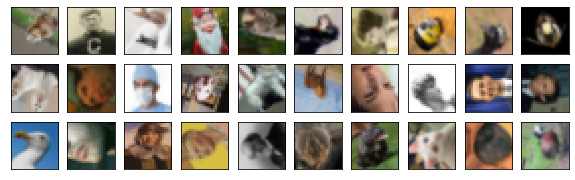

In [27]:
y_aug = np.clip(y_aug, 0, 255)
X_aug = np.clip(X_aug, 0, 1)
plot_images(3,10,y_aug[30:])

In [28]:
### 새로 학습하고 검증용 데이터 적용하기
X_aug_flat = X_aug.reshape(-1, imgR*imgC*channel)
y_aug_flat = y_aug.reshape(-1, imgR*imgC*channel)
knn.fit(X_aug_flat, y_aug_flat)

KNeighborsClassifier()

<Figure size 432x288 with 0 Axes>

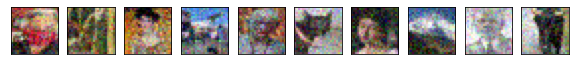

<Figure size 432x288 with 0 Axes>

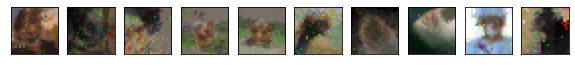

In [29]:
denoised = knn.predict(X_test_noisy.reshape(-1, imgR*imgC*channel))
denoised = denoised.reshape(-1, imgR, imgC, channel)
plot_images(1,10,X_test_noisy)
plot_images(1,10,denoised)

<Figure size 432x288 with 0 Axes>

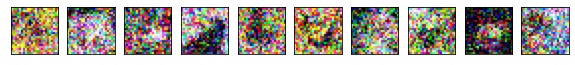

<Figure size 432x288 with 0 Axes>

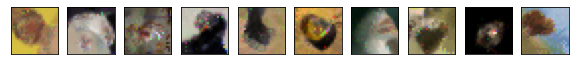

In [30]:
images = it.next()
testX = images + np.random.randn(nData, imgR, imgC, channel)*0.4
testX = np.clip(testX, 0, 1)
denoised = knn.predict(testX.reshape(-1, imgR*imgC*channel))
denoised = denoised.reshape(-1,imgR,imgC,channel)

plot_images(1,10,testX)
plot_images(1,10,denoised)